   symboling  normalized-losses         make fuel-type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   
2          1                NaN  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68       

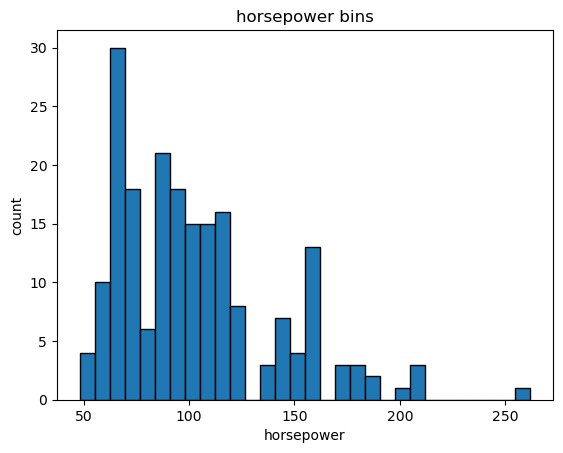

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,False,True
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,False,True
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,False,True
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,False,True
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,False,True


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set column headers
headers = [
    "symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
    "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
    "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
    "peak-rpm","city-mpg","highway-mpg","price"
]

# Load CSV, assign headers, treat "?" as NaN
df = pd.read_csv('usedcars.csv', names=headers, na_values="?")

# Show first few rows
print(df.head())

# Evaluate missing data
print(df.isnull().sum())

# Replace missing values with column means (for numeric columns)
for col in ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm"]:
    df[col] = df[col].astype(float)
    df[col] = df[col].fillna(df[col].mean())

# 'num-of-doors' - replace with mode
most_frequent_doors = df['num-of-doors'].mode()[0]
df['num-of-doors'] = df['num-of-doors'].fillna(most_frequent_doors)

# Drop rows with missing price
df.dropna(subset=["price"], inplace=True)
df.reset_index(drop=True, inplace=True)

# Convert data types
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype(float)
df[["normalized-losses"]] = df[["normalized-losses"]].astype(int)
df[["price"]] = df[["price"]].astype(float)
df[["peak-rpm"]] = df[["peak-rpm"]].astype(float)

# Convert mpg to L/100km
df['city-L/100km'] = 235 / df["city-mpg"]
df['highway-L/100km'] = 235 / df["highway-mpg"]

# Normalize length, width, height
for col in ['length', 'width', 'height']:
    df[col] = df[col] / df[col].max()

print(df[["length", "width", "height"]].head())

# Binning horsepower
df["horsepower"] = df["horsepower"].astype(int)
bins = np.linspace(df["horsepower"].min(), df["horsepower"].max(), 4)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)

print(df[['horsepower', 'horsepower-binned']].head(20))
print(df["horsepower-binned"].value_counts())

# Save to new CSV
df.to_csv("usedcars_modified.csv", index=False)

# Plot histogram of horsepower bins
plt.hist(df["horsepower"], bins=30, edgecolor='k')
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
plt.show()

## Indicator/ Dummy Variables
df.columns

dummy_variable_1 = pd.get_dummies(df["fuel-type"]) #this will be dummy variable 1
dummy_variable_1.head()

# This creates a new DataFrame with the renamed columns, original remains unchanged by using "inplace=False" rather than True
# inplace=False means the original DataFrame is not changed.
dummy_variable_renamed = dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=False) 
dummy_variable_1.head()


# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=False)

df.to_csv("usedcars_modified.csv", index=False)
df.head()